In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [31]:
train_data_main = pd.read_csv("/media/sidd/Education/DataSets/Digit Recognizer/train.csv",encoding='utf-8', dtype=np.float32)
test_data_main = pd.read_csv("/media/sidd/Education/DataSets/Digit Recognizer/test.csv",encoding='utf-8', dtype=np.float32)

In [32]:
train_data_main.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
test_data_main.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y_train_full = train_data_main['label']
y_train_full.head()

0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32

In [35]:
X_train_full = train_data_main.drop(['label'],axis =1)
X_train_full.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Normalization
X_train_full =  X_train_full/255
X_test_full = test_data_main/255

In [37]:
#Reshape
X_train_full = X_train_full.values.reshape(-1, 28, 28, 1)
X_test_full = X_test_full.values.reshape(-1,28,28,1)

	 Digit :  1.0


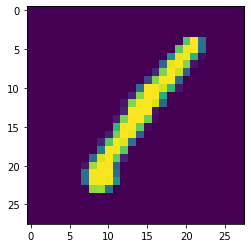

In [112]:
i = 0 #item number
plt.imshow(X_train_full[i])
print("\t Digit : ",y_train_full[i])

In [42]:
X_valid , X_train  = X_train_full[:5000],X_train_full[5000:]
y_valid , y_train  = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_full

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential()

In [45]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
w , b = model.layers[1].get_weights()
print(w)
print(b)

[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [50]:
model.compile(loss="sparse_categorical_crossentropy",  #for labled output
              optimizer = "sgd", #stochastic gradient desent
              metrics=["accuracy"])

In [51]:
model_hist = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.7392 - accuracy: 0.8126 - val_loss: 0.3770 - val_accuracy: 0.8942
Epoch 2/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.9066 - val_loss: 0.2907 - val_accuracy: 0.9190
Epoch 3/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.9220 - val_loss: 0.2553 - val_accuracy: 0.9294
Epoch 4/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.2388 - accuracy: 0.9308 - val_loss: 0.2382 - val_accuracy: 0.9344
Epoch 5/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.2120 - accuracy: 0.9388 - val_loss: 0.2059 - val_accuracy: 0.9424
Epoch 6/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.1902 - accuracy: 0.9456 - val_loss: 0.1897 - val_accuracy: 0.9460
Epoch 7/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.1727 - accuracy: 0.9512 - val_loss: 0.1770 - val_ac

1157/1157 [==============================] - 2s 2ms/step - loss: 0.0105 - accuracy: 0.9992 - val_loss: 0.0802 - val_accuracy: 0.9774
Epoch 58/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.0101 - accuracy: 0.9994 - val_loss: 0.0813 - val_accuracy: 0.9780
Epoch 59/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.0097 - accuracy: 0.9995 - val_loss: 0.0807 - val_accuracy: 0.9788
Epoch 60/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.0094 - accuracy: 0.9994 - val_loss: 0.0798 - val_accuracy: 0.9784
Epoch 61/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.0090 - accuracy: 0.9995 - val_loss: 0.0810 - val_accuracy: 0.9772
Epoch 62/100
1157/1157 [==============================] - 3s 2ms/step - loss: 0.0086 - accuracy: 0.9996 - val_loss: 0.0807 - val_accuracy: 0.9782
Epoch 63/100
1157/1157 [==============================] - 3s 3ms/step - loss: 0.0083 - accuracy: 0.9996 - val_loss: 0.0819 - val_accuracy

In [52]:
model_hist.params

{'verbose': 1, 'epochs': 100, 'steps': 1157}

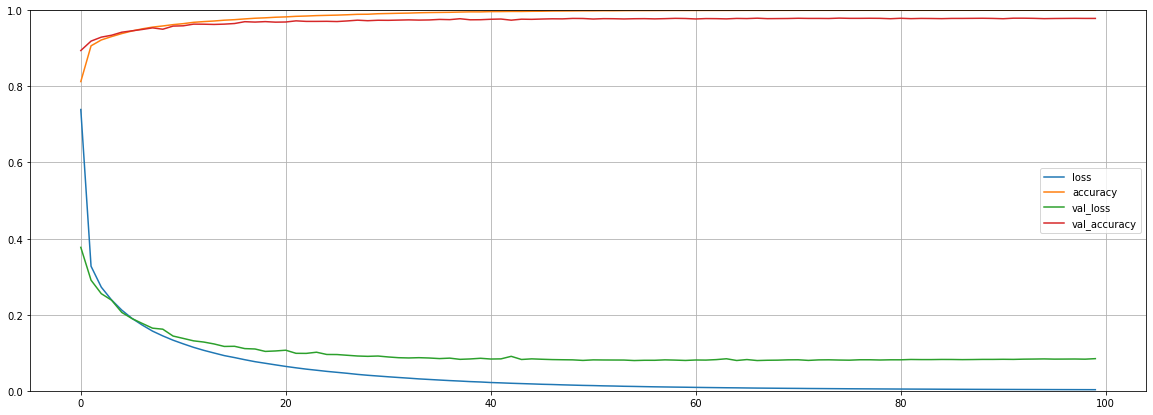

In [53]:
pd.DataFrame(model_hist.history).plot(figsize =(20,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
y_prob = model.predict(X_test)

In [56]:
y_prob.round(2)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

[9.2103295e-03 1.1590582e-09 2.9812467e-03 4.6905011e-06 1.3988595e-02
 1.4315428e-06 6.9010566e-06 2.5571490e-04 1.4944400e-05 9.7353607e-01]


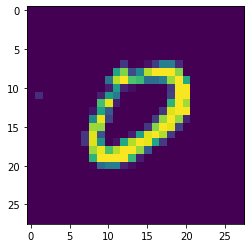

In [57]:
i = 3 #item number
plt.imshow(X_test_full[i])
print(y_prob[i])


In [58]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 9, ..., 3, 9, 2])

	 Prob :  [3.0515330e-12 1.2866460e-19 1.0000000e+00 5.0786664e-13 2.3747193e-12
 3.9707109e-21 4.3360375e-15 1.8142951e-12 6.5518814e-13 7.8707980e-16]

	 Digit :  2


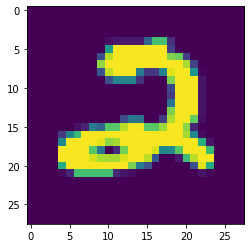

In [115]:
i = 0 #item number
plt.imshow(X_test_full[i])
print("\t Prob : ",y_prob[i])
print("\n\t Digit : ",y_pred[i])

In [97]:
print(len(X_test_full))
print(len(y_pred))
print(type(y_pred))

28000
28000
<class 'numpy.ndarray'>


In [117]:
label = list(y_pred)
label[:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]

In [93]:
ImageId = [x for x in range(1,len(X_test_full)+1)]

In [102]:
print(len(ImageId))
print(len(label))
print(ImageId[0])

28000
28000
1


In [103]:
data = {"ImageId": ImageId, "Label":label}

In [104]:
df = pd.DataFrame (data, columns = ['ImageId','Label'])

In [105]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [106]:
df.to_csv('sample_submission.csv', index=False)